In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# read Census data CSV file into dataframe for Education Scores
census_df = pd.read_csv('Census Main Analysis Data.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32,
                             'StateScore':np.float32
                     }).iloc[:,1:]

# read IRS AGI data CSV file into dataframe for Income Scores
IRS_df = pd.read_csv('IRS AGI Main Analysis Data.csv', 
                     dtype={"ZIPCODE":np.int32,"STATE":'category',
                             'ZipScore':np.float32,'YEAR':np.int32,
                             'StateScore':np.float32
                     }).iloc[:,1:]

# Education Scores Section

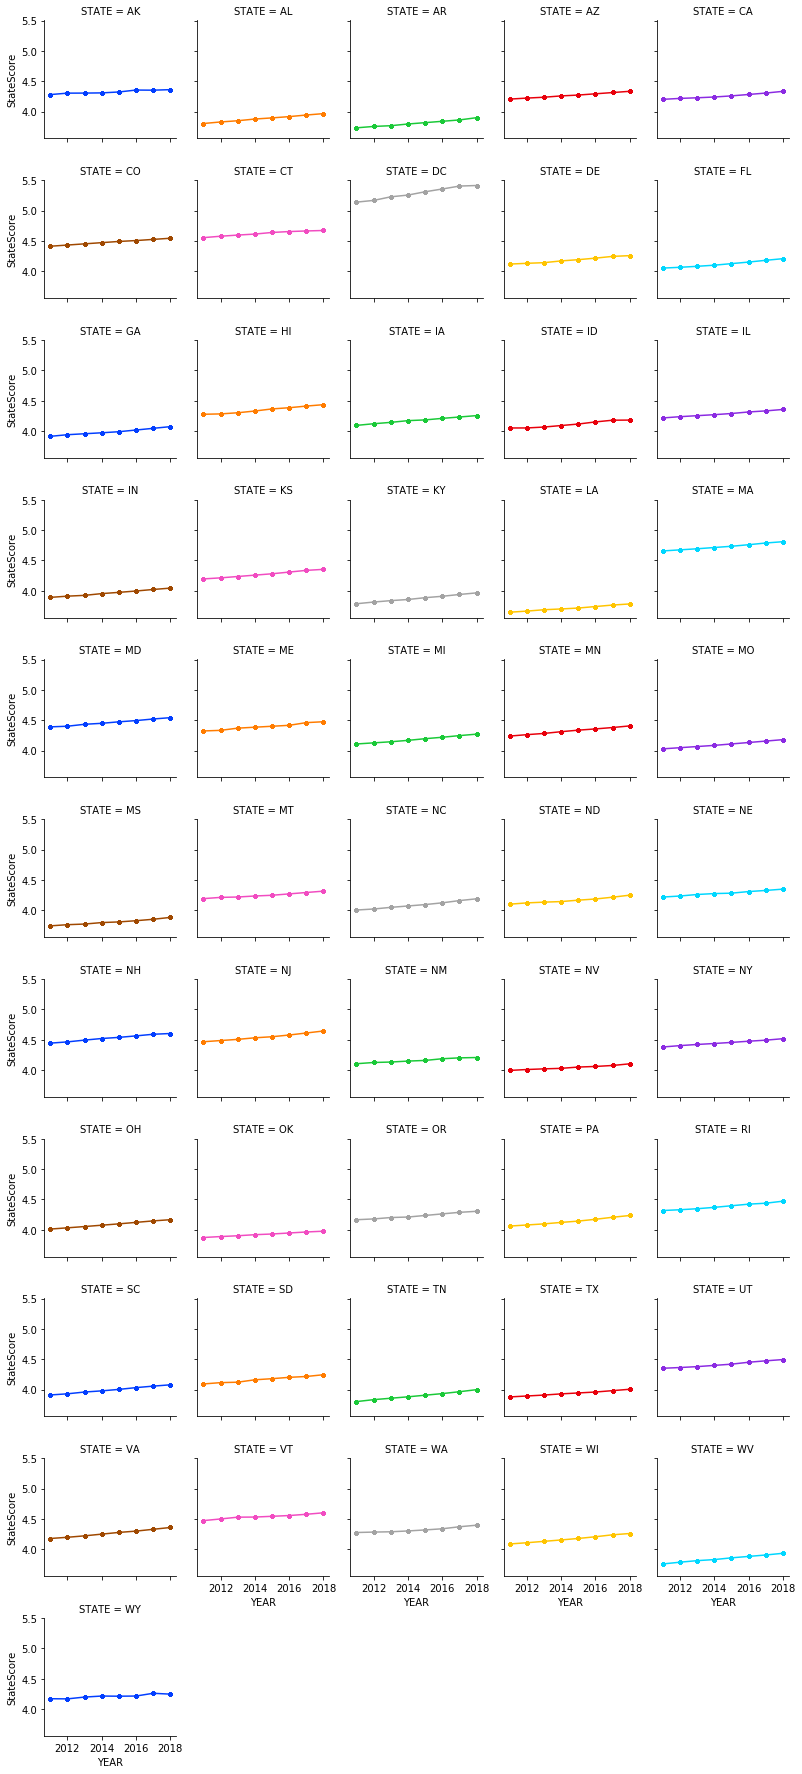

In [2]:
# Create line graphs of Education Scores aggregated by State to show education attainment trends
g = sns.FacetGrid(census_df, col="STATE", col_wrap=5, height=2.25, hue='STATE', palette = 'bright')
g = g.map(plt.plot, "YEAR", "StateScore", marker=".")

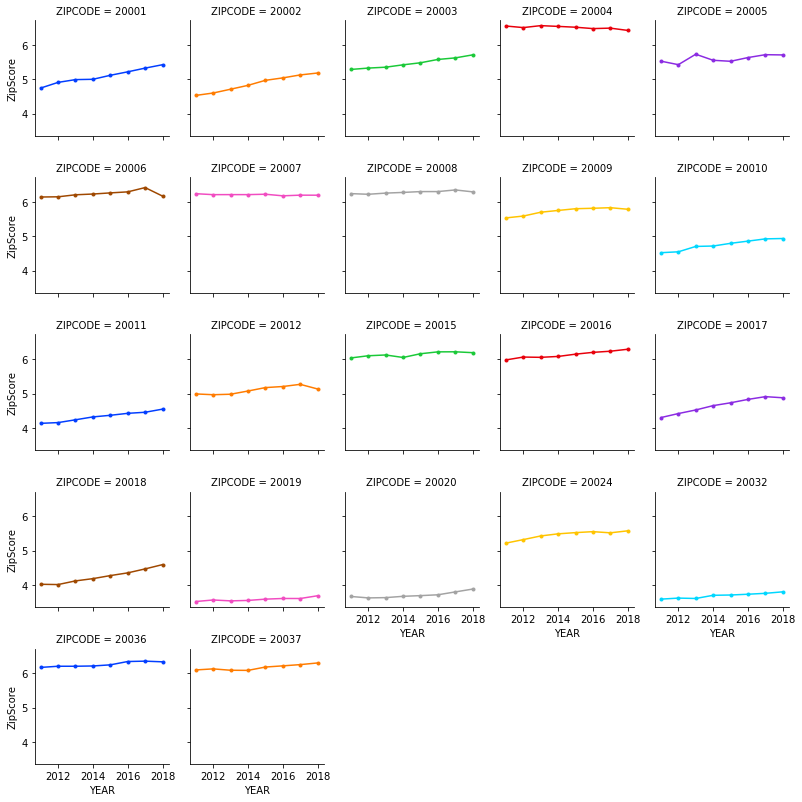

In [3]:
# By visual inspection of the line graphs above, District of Columbia (DC) appears to 
# have the best Education score trend. The following code analyzes the zip codes in DC more closely.
g = sns.FacetGrid(census_df[census_df.STATE == 'DC'], col="ZIPCODE", col_wrap=5, height=2.25, hue='ZIPCODE', palette = 'bright')
g = g.map(plt.plot, "YEAR", "ZipScore", marker=".")

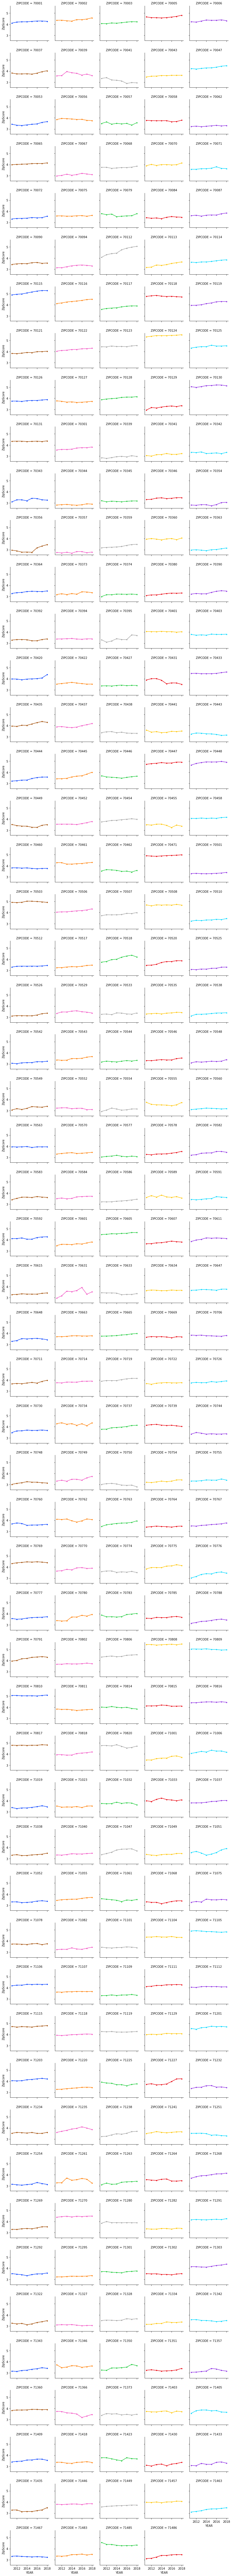

In [4]:
# By visual inspection of the line graphs above, Louisisna (LA) appears to have 
# the worst Education score trend. The following code analyzes the zip codes in MS more closely.
g = sns.FacetGrid(census_df[census_df.STATE == 'LA'], col="ZIPCODE", col_wrap=5, height=2.25, hue='ZIPCODE', palette = 'bright')
g = g.map(plt.plot, "YEAR", "ZipScore", marker=".")

# Income Scores Section

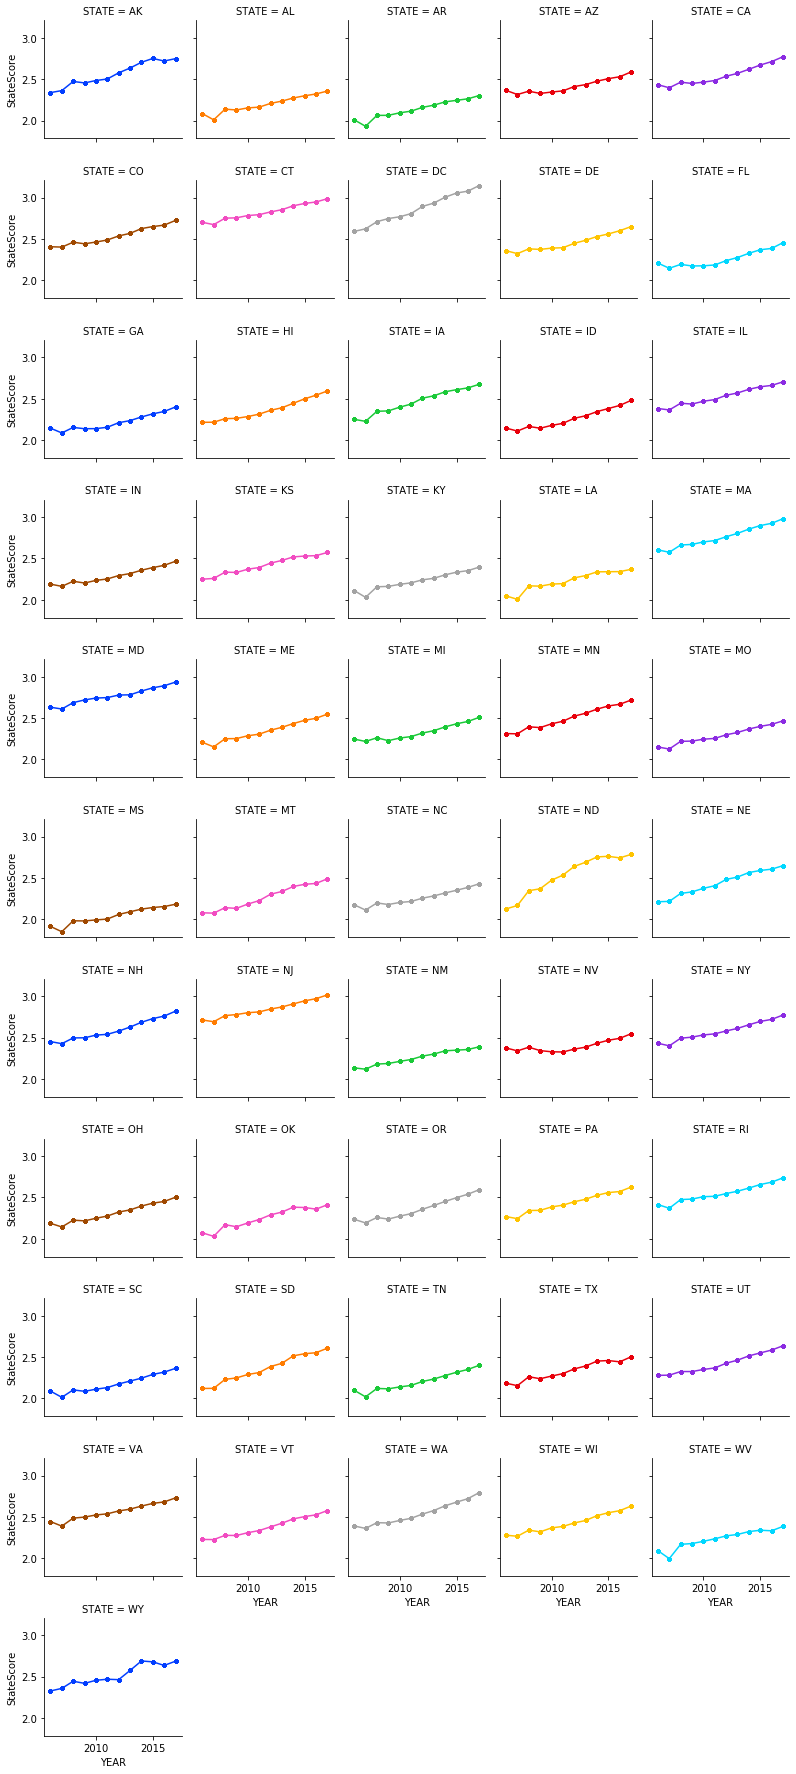

In [5]:
# Create line graphs of Income Scores aggregated by State to show trends
g = sns.FacetGrid(IRS_df, col="STATE", col_wrap=5, height=2.25, hue='STATE', palette = 'bright')
g = g.map(plt.plot, "YEAR", "StateScore", marker=".")

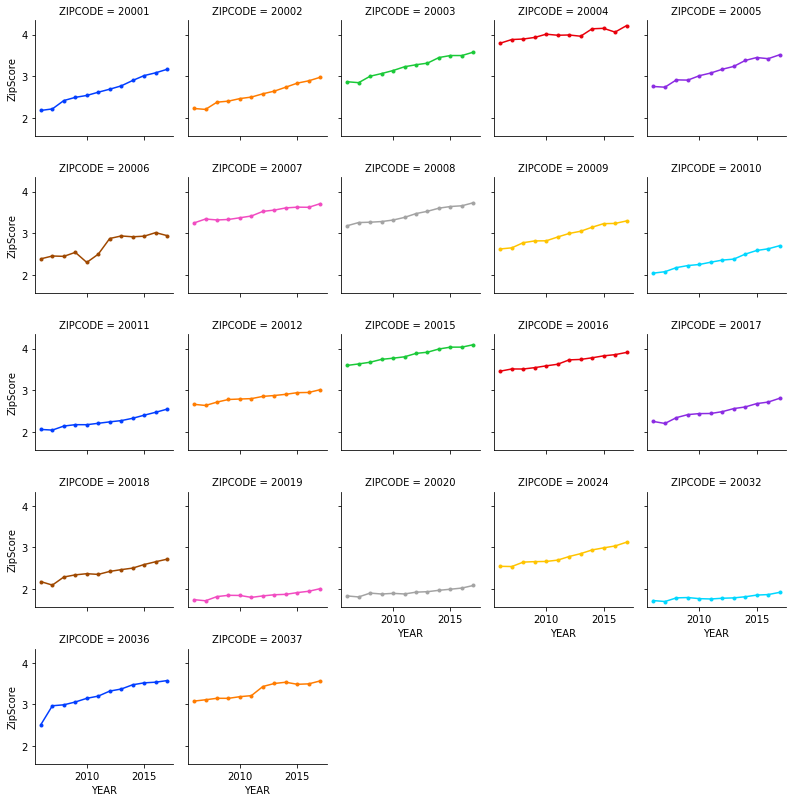

In [6]:
# By visual inspection of the line graphs above, District of Columbia (DC) appears to 
# have the best Income score trend. The following code analyzes the zip codes in DC more closely.
g = sns.FacetGrid(IRS_df[IRS_df.STATE == 'DC'], col="ZIPCODE", col_wrap=5, height=2.25, hue='ZIPCODE', palette = 'bright')
g = g.map(plt.plot, "YEAR", "ZipScore", marker=".")

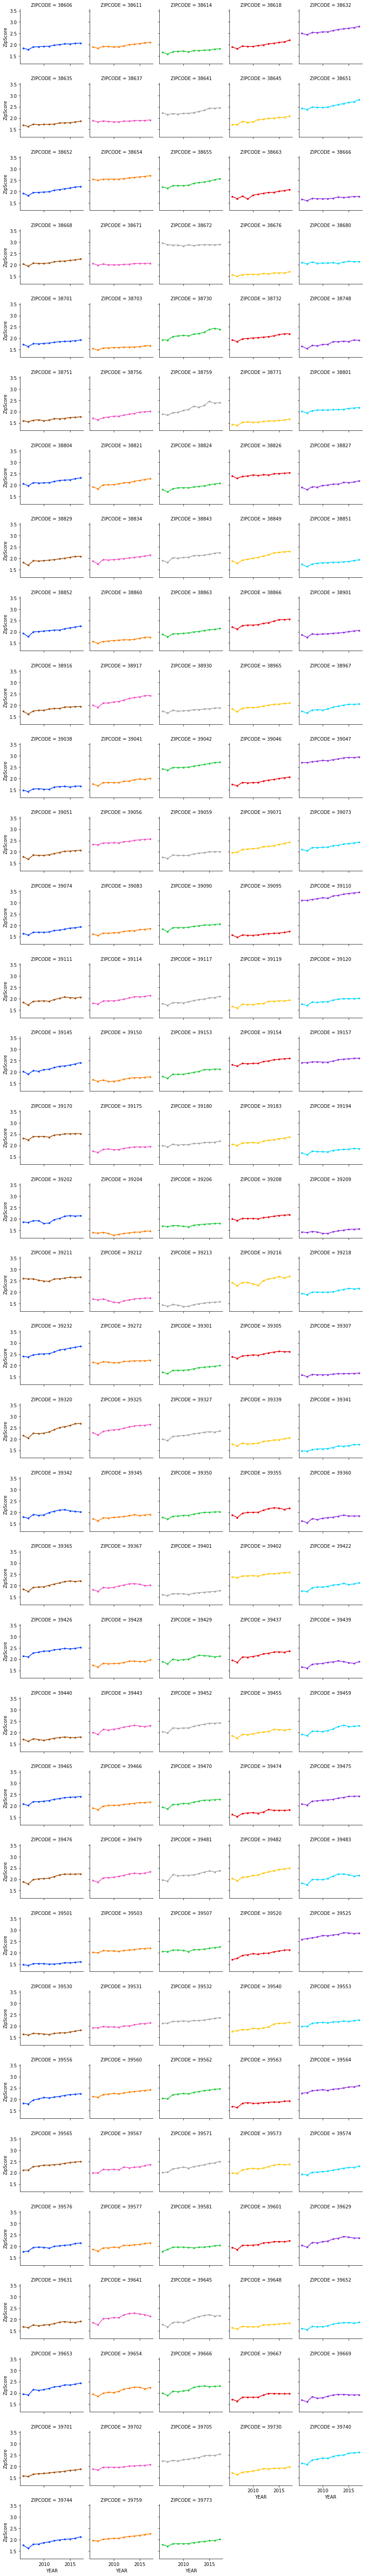

In [7]:
# By visual inspection of the line graphs above, Mississippi (MS) appears to have 
# the worst Income score trend. The following code analyzes the zip codes in MS more closely.
g = sns.FacetGrid(IRS_df[IRS_df.STATE == 'MS'], col="ZIPCODE", col_wrap=5, height=2.25, hue='ZIPCODE', palette = 'bright')
g = g.map(plt.plot, "YEAR", "ZipScore", marker=".")

# Correlation Section

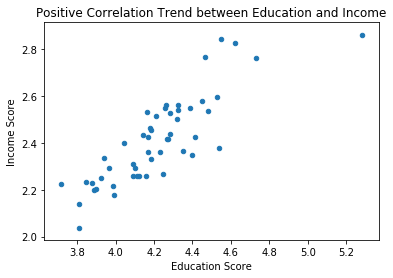

In [10]:
# By combining the Census and IRS AGI dataframes then using a scatterplot to plot the Education and Income 
# Scores, we can see that there is certainly a positive relationships between the two. In other words,
# the higher your education, the higher your income. **Data was aggregated by State and not by Zip Code due
# to too many Zip Code data points resulting in a "blobplot" and not a scatterplot**

sub_census_df = census_df[['STATE','StateScore']].drop_duplicates().groupby('STATE').mean()
sub_IRS_df = IRS_df[['STATE','StateScore']].drop_duplicates().groupby('STATE').mean()
combined_df = sub_census_df.merge(sub_IRS_df,on='STATE',how='inner')
combined_df = combined_df.rename(columns={'StateScore_x':'EducationScore','StateScore_y':'IncomeScore'})

combined_df.plot.scatter(x='EducationScore',y='IncomeScore')
plt.xlabel('Education Score')
plt.ylabel('Income Score')
plt.title('Positive Correlation between Education and Income')
plt.show()